In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing.dummy import Pool as ThreadPool
from tqdm import tqdm
from multiprocessing import Pool
import numpy.ma as ma
from scipy.ndimage import gaussian_filter, convolve
import sys

sys.path.append("../")
import utils

In [2]:
event_data = np.loadtxt("../data/events.txt")
position_data = np.loadtxt("../data/groundtruth.txt")

In [3]:
#params
t_start = 0.0
duration = 3.9

img_height = 180
img_width = 240

In [4]:
events_range = utils.get_events_range(event_data, t_start, duration)

In [5]:
patch_center = (40, 76)
patch_size = 15
x_lim = (patch_center[1] - int(patch_size/2), patch_center[1] + int(patch_size/2))
y_lim = (patch_center[0] - int(patch_size/2), patch_center[0] + int(patch_size/2))
print(x_lim)

events_filtered = events_range
events_filtered = events_filtered[np.logical_and((x_lim[0] <= events_filtered[:,1]) , (events_filtered[:,1] <= x_lim[1]))]
events_filtered = events_filtered[np.logical_and((y_lim[0] <= events_filtered[:,2]) , (events_filtered[:,2] <= y_lim[1]))]
#events_filtered = events_filtered[[(y_lim[0] >= events_range[:,2]) & (events_range[:,2] <= y_lim[1])]
events_filtered = np.array(events_filtered)

(69, 83)


In [6]:
def img_from_events(events):
    img = np.zeros((img_height, img_width))
    for e in events:
        if e[3] == 1:
            continue
        x = int(e[1])
        y = int(e[2])
        img[y, x] += 1
    return img

In [7]:
def img_from_events_patch(events, patch_size):
    img = np.zeros((patch_size, patch_size))
    for e in events:
        if e[3] == 1:
            continue
        x = int(e[1]) - patch_center[1] + int(patch_size/2)
        y = int(e[2]) - patch_center[0] + int(patch_size/2)
        img[y, x] += 1
    return img

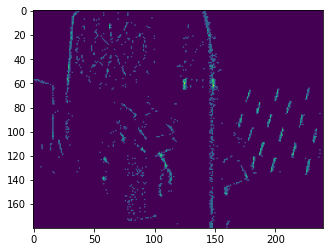

In [8]:
plt.imshow(img_from_events(events_range))